# EJERCICIO 1: Reducción y normalización
# EJERCICIO 2: Limpieza e imputación

1. Preparación (cargas + limpieza mínima)

In [75]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
import seaborn as sns
from IPython.display import display, Markdown  # <-- Importar Markdown

In [55]:
# Telco - cargar datos 
df_telco = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_telco.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


2. Procedemos con la reduccion - quedamos con las columnas imprescindibles antes de proceder con la exploración. Solo necesitamos las columnas numericas o las que deberian de ser numericas. Son operaciones relativas a **Ejercicio 1 (reducción - por columnas):**

**Reducir a 3 variables**

In [56]:
# Definir la lista de variables numéricas que vamos a usar después
num_telco = ["tenure", "MonthlyCharges", "TotalCharges"]

df_telco_num = df_telco[num_telco]
len(df_telco_num) # contamos filas del dataset original reducido solo por columnas

7043

3. Verificamos los NA y blancos:

In [57]:
print("NA:\n", df_telco_num.isna().sum())
print("Blancos:\n", df_telco_num.apply(lambda col: (col.astype(str).str.strip() == "").sum()))
df_telco_num.dtypes

NA:
 tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
Blancos:
 tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64


tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

4. Arreglamos el dataset. Son operaciones relativas al **Ejercicio 2 (limpieza e imputación):**

**Convertir en número la columna TotalCharges**

**Reemplazar los NA o blancos por Media**

In [58]:
# Convertir en número
df_telco_num["TotalCharges"] = pd.to_numeric(df_telco_num["TotalCharges"], errors="coerce") 
# Convertir en Num TotalCharges porque es object.

C:\Users\User\AppData\Local\Temp\ipykernel_7088\3133455070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telco_num["TotalCharges"] = pd.to_numeric(df_telco_num["TotalCharges"], errors="coerce")


In [59]:
# Convertir blancos a NaN
df_telco_num["TotalCharges"] = df_telco_num["TotalCharges"].replace("", np.nan)

C:\Users\User\AppData\Local\Temp\ipykernel_7088\3670444073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telco_num["TotalCharges"] = df_telco_num["TotalCharges"].replace("", np.nan)


In [60]:
# Rellenar con la mediana
df_telco_num["TotalCharges"] = df_telco_num["TotalCharges"].fillna(df_telco_num["TotalCharges"].median())

C:\Users\User\AppData\Local\Temp\ipykernel_7088\1749050916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telco_num["TotalCharges"] = df_telco_num["TotalCharges"].fillna(df_telco_num["TotalCharges"].median())


In [61]:
# volvemos a comprobar el efecto 
print("NA:\n", df_telco_num.isna().sum())
print("Blancos:\n", df_telco_num.apply(lambda col: (col.astype(str).str.strip() == "").sum()))
df_telco_num.dtypes

NA:
 tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64
Blancos:
 tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

Reducimos la cantidad del dataset. Es operación relativa a **Ejercicio 1 (reducción - por filas):**

**Muestreo del 10 %**

In [62]:
# Telco: 10% de los datos
df_telco_num = df_telco_num.sample(frac=0.1, random_state=42)
len(df_telco_num)

704

5. Box-Cox (ANTES y DESPUÉS) para Telco
La demostración más clara de la transformación de normalidad. Es operación relativa a **Ejercicio 2 (normalización):**

**Box-Cox** (Box-Cox no cambia la información, pero cambia la forma en la que los números están distribuidos, estirando lo que está muy junto y comprimiendo lo que está muy separado)

**Figura 1. Box-Cox - Antes y después**

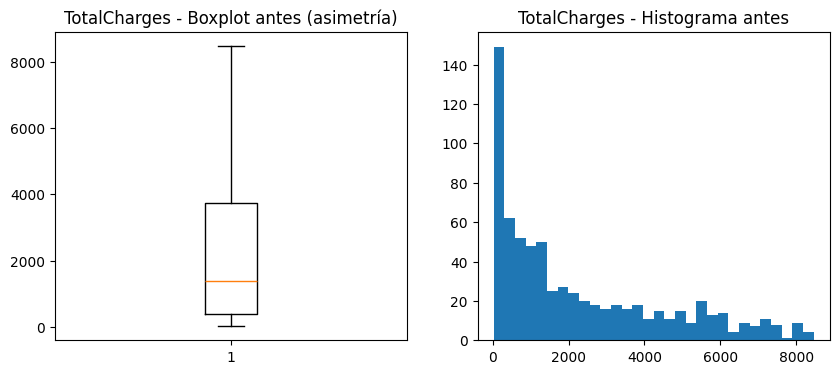

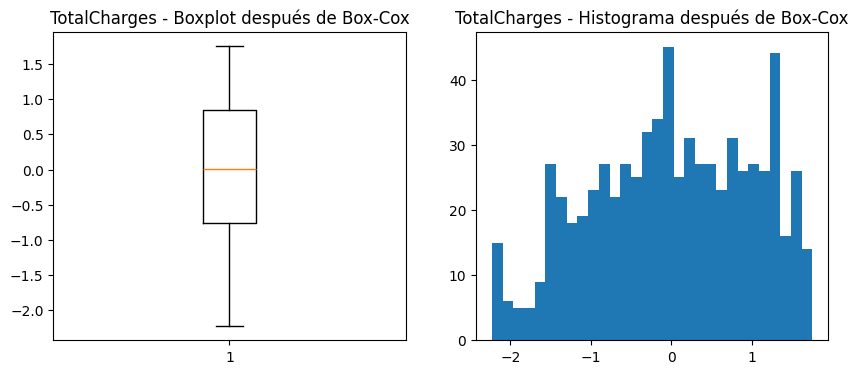

In [79]:
# --- ANTES ---
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].boxplot(df_telco_num["TotalCharges"])
ax[0].set_title("TotalCharges - Boxplot antes (asimetría)")

ax[1].hist(df_telco_num["TotalCharges"], bins=30)
ax[1].set_title("TotalCharges - Histograma antes")

display(Markdown("**Figura 1. Box-Cox - Antes y después**"))
    
plt.show()

# Preparar variable positiva para Box-Cox
df_telco_num["TotalCharges_pos"] = df_telco_num["TotalCharges"] - df_telco_num["TotalCharges"].min() + 0.1

# --- DESPUÉS ---
pt = PowerTransformer(method="box-cox")
df_telco_num["TotalCharges_boxcox"] = pt.fit_transform(df_telco_num[["TotalCharges_pos"]])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].boxplot(df_telco_num["TotalCharges_boxcox"])
ax[0].set_title("TotalCharges - Boxplot después de Box-Cox")

ax[1].hist(df_telco_num["TotalCharges_boxcox"], bins=30)
ax[1].set_title("TotalCharges - Histograma después de Box-Cox")

plt.show()

Tras aplicar Box-Cox a TotalCharges, se observa que la distribución se centra alrededor de cero y la asimetría positiva disminuye, aunque aparecen picos debido a la presencia de valores repetidos y a la compresión de la escala original. Esto permite que posteriormente la variable sea más adecuada para técnicas que asumen normalidad, como z-score o PCA.

Creado con docs scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

6. Z-score (ANTES y DESPUÉS). Es operación relativa a **Ejercicio 2 (normalización):**

**z-Score** (z-score convierte cada valor en “cuántas desviaciones estándar se aleja de la media”, de modo que todos los datos quedan en la misma escala y es más fácil compararlos).

In [64]:
# Antes
df_telco_num.describe()

,tenure,MonthlyCharges,TotalCharges,TotalCharges_pos,TotalCharges_boxcox
count,704.000000,704.000000,704.000000,704.000000,7.040000e+02
mean,32.473011,65.377344,2270.961861,2251.661861,1.513940e-16
std,24.792668,29.663346,2242.977458,2242.977458,1.000711e+00
min,1.000000,18.800000,19.400000,0.100000,-2.227934e+00
25%,9.000000,40.250000,399.337500,380.037500,-7.553631e-01
50%,29.000000,70.500000,1384.625000,1365.325000,5.573739e-03
75%,55.000000,89.662500,3732.150000,3712.850000,8.447671e-01
max,72.000000,117.200000,8468.200000,8448.900000,1.753194e+00


In [65]:
# Después
scaler = StandardScaler()
df_telco_scaled = pd.DataFrame(scaler.fit_transform(df_telco_num), columns=df_telco_num.columns)
df_telco_scaled.describe()

,tenure,MonthlyCharges,TotalCharges,TotalCharges_pos,TotalCharges_boxcox
count,7.040000e+02,7.040000e+02,7.040000e+02,7.040000e+02,7.040000e+02
mean,-1.211152e-16,-2.901719e-16,5.803439e-17,-2.270911e-17,-2.523234e-17
std,1.000711e+00,1.000711e+00,1.000711e+00,1.000711e+00,1.000711e+00
min,-1.270351e+00,-1.571315e+00,-1.004541e+00,-1.004541e+00,-2.227934e+00
25%,-9.474455e-01,-8.476862e-01,-8.350307e-01,-8.350307e-01,-7.553631e-01
50%,-1.401818e-01,1.728159e-01,-3.954418e-01,-3.954418e-01,5.573739e-03
75%,9.092610e-01,8.192745e-01,6.519134e-01,6.519134e-01,8.447671e-01
max,1.595435e+00,1.748269e+00,2.764916e+00,2.764916e+00,1.753194e+00


Antes del escalado, las variables mostraban sus valores originales y estadísticas intuitivas, fáciles de interpretar. Después del escalado y transformaciones, los datos tienen media cercana a 0 y desviación estándar 1, lo que puede parecer “extraño”, pero es justo lo que necesitamos para Machine Learning: ahora las variables están normalizadas y más adecuadas para técnicas que asumen normalidad o dependen de la escala, como z-score, PCA o modelos basados en distancia.

creado con https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

7. Min–max en Telco. Es operación relativa a **Ejercicio 2 (normalización):**

**MinMaxscaler** (El MinMaxScale estira o encoge los valores para que todos queden entre 0 y 1, manteniendo sus proporciones originales pero poniéndolos en una escala común).

In [66]:
scaler_mm = MinMaxScaler()
df_telco_mm = df_telco_num.copy()
df_telco_mm[num_telco] = scaler_mm.fit_transform(df_telco_mm[num_telco])
print("Antes de min-max \n",df_telco_num[num_telco].describe()), print("Despues de min-max\n",df_telco_mm[num_telco].describe())

Antes de min-max 
            tenure  MonthlyCharges  TotalCharges
count  704.000000      704.000000    704.000000
mean    32.473011       65.377344   2270.961861
std     24.792668       29.663346   2242.977458
min      1.000000       18.800000     19.400000
25%      9.000000       40.250000    399.337500
50%     29.000000       70.500000   1384.625000
75%     55.000000       89.662500   3732.150000
max     72.000000      117.200000   8468.200000
Despues de min-max
            tenure  MonthlyCharges  TotalCharges
count  704.000000      704.000000    704.000000
mean     0.443282        0.473347      0.266495
std      0.349193        0.301457      0.265479
min      0.000000        0.000000      0.000000
25%      0.112676        0.217988      0.044969
50%      0.394366        0.525407      0.161588
75%      0.760563        0.720147      0.439441
max      1.000000        1.000000      1.000000


(None, None)

Antes de aplicar MinMaxScaler, las variables (tenure, MonthlyCharges, TotalCharges, etc.) conservaban sus valores originales, con medias, mínimos y máximos intuitivos y rangos muy amplios. Después de aplicar MinMaxScaler, todos los valores se reescalan al rango [0, 1]. Esto hace que las variables sean comparables entre sí y evita que algunas dominen a otras por su magnitud, lo que es muy útil para algoritmos de Machine Learning sensibles a la escala, como redes neuronales, k-NN o clustering. Además, aunque la forma de la distribución no cambia, la normalización asegura que cada variable contribuya de manera equilibrada al modelo.

Creado con apoyo en la documentación de scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

8. ACP (reducción de dimensionalidad en Telco). Corresponde al **Ejercicio 2 (normalización):**

**ACP** (El ACP reduce muchas columnas a unas pocas “súper-columnas” que resumen la información más importante, permitiendo ver patrones sin tanto ruido).

In [67]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_telco_scaled[num_telco])

variance = pca.explained_variance_ratio_
variance

array([0.71047051, 0.26924377])

**Figura 2. APC - Antes y después**

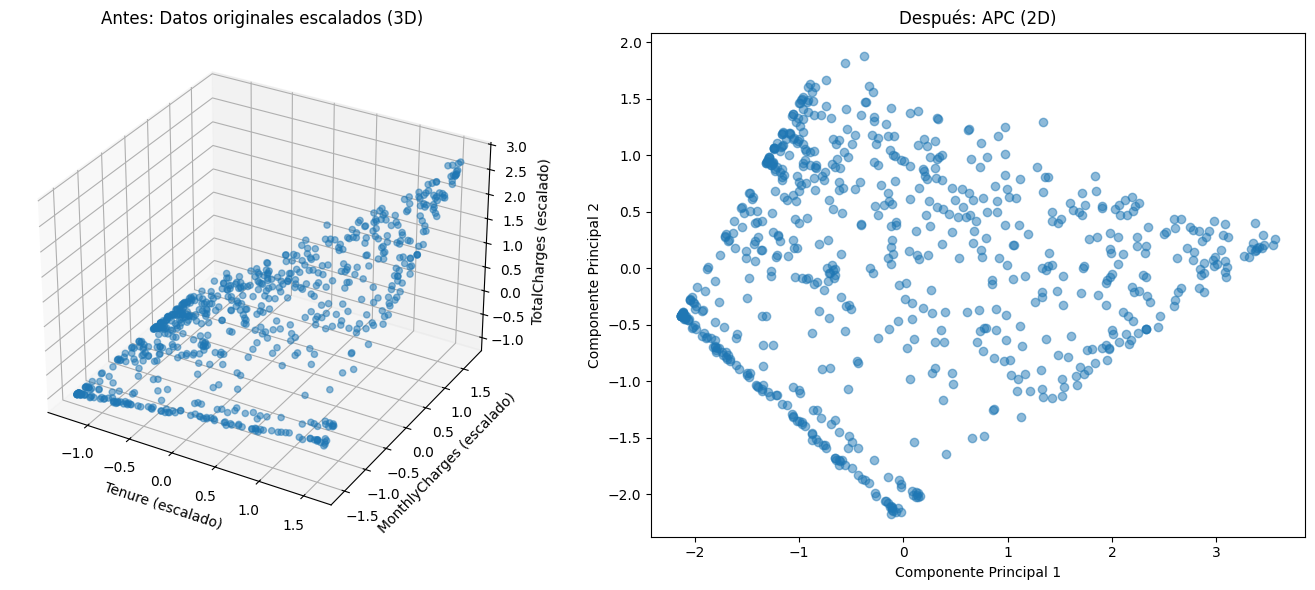

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura
fig = plt.figure(figsize=(14,6))

# Antes: datos originales escalados en 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df_telco_scaled['tenure'], df_telco_scaled['MonthlyCharges'], df_telco_scaled['TotalCharges'], alpha=0.5)
ax1.set_xlabel('Tenure (escalado)')
ax1.set_ylabel('MonthlyCharges (escalado)')
ax1.set_zlabel('TotalCharges (escalado)')
ax1.set_title('Antes: Datos originales escalados (3D)')

# Después: PCA en 2 componentes (2D)
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(components[:, 0], components[:, 1], alpha=0.5)
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.set_title('Después: APC (2D)')

display(Markdown("**Figura 2. APC - Antes y después**"))
plt.tight_layout()
plt.show()

Izquierda: muestra tres variables originales escaladas en un gráfico 3D.

Derecha: muestra los mismos datos reducidos a 2 dimensiones con PCA, capturando ~98% de la varianza.

El gráfico de la izquierda muestra las tres variables originales escaladas (tenure, MonthlyCharges, TotalCharges) en un espacio 3D, permitiendo observar su dispersión y relaciones directas. La derecha muestra los mismos datos reducidos a 2 dimensiones mediante PCA, que captura aproximadamente el 98% de la varianza total. Esto demuestra que casi toda la información de las tres variables originales puede representarse en un espacio de menor dimensión, lo que facilita visualización, análisis exploratorio y la aplicación de algoritmos de Machine Learning que se benefician de menos dimensiones sin perder información relevante.

Creado con apoyo de tutorial para graficos 3D:  https://www.geeksforgeeks.org/python/3d-scatter-plotting-in-python-using-matplotlib/ 

Documentación oficial de scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**Tabla 1. Comparativa de técnicas de normalización**
| Técnica   | Qué hace                                                                 | Casos de uso                                                         | Indicaciones para uso                                                         |
|-----------|---------------------------------------------------------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Box-Cox** | Cambia la forma de los datos para que se parezcan más a una distribución normal. | Mejorar modelos que funcionan mejor con datos “normales” o simétricos. | Cuando hay datos muy inclinados o con distribuciones raras. |
| **Z-Score** | Centra los datos en 0 y los escala usando su desviación estándar.       | Poner variables en la misma escala, detectar outliers.                  | Cuando las variables tienen unidades distintas o el modelo es sensible a escalas. |
| **Min-Max** | Escala los datos a un rango fijo (0 a 1 normalmente).                   | Mantener proporciones y preparar modelos como redes neuronales.         | Cuando se necesita un rango uniforme sin cambiar la forma de los datos. |
| **ACP (PCA)** | Reduce dimensiones creando nuevas columnas que resumen la información más importante. | Simplificar datasets grandes y eliminar ruido.                           | Cuando hay muchas columnas y algunas cuentan “casi lo mismo”. |

Basado en Subirats et al. (2019).


# EJERCICIO 3: Correlación y regresión

**Telco - aplicar metodos de correlación de Pearson y Spearman**

Telco Pearson:
                   tenure  MonthlyCharges  TotalCharges  Churn_Yes
tenure          1.000000        0.199944      0.818524  -0.401231
MonthlyCharges  0.199944        1.000000      0.624152   0.211644
TotalCharges    0.818524        0.624152      1.000000  -0.232447
Churn_Yes      -0.401231        0.211644     -0.232447   1.000000
Telco Spearman (tenure vs Churn):
                   tenure  MonthlyCharges  TotalCharges  Churn_Yes
tenure          1.000000        0.228806      0.884370  -0.416991
MonthlyCharges  0.228806        1.000000      0.599184   0.200096
TotalCharges    0.884370        0.599184      1.000000  -0.276912
Churn_Yes      -0.416991        0.200096     -0.276912   1.000000


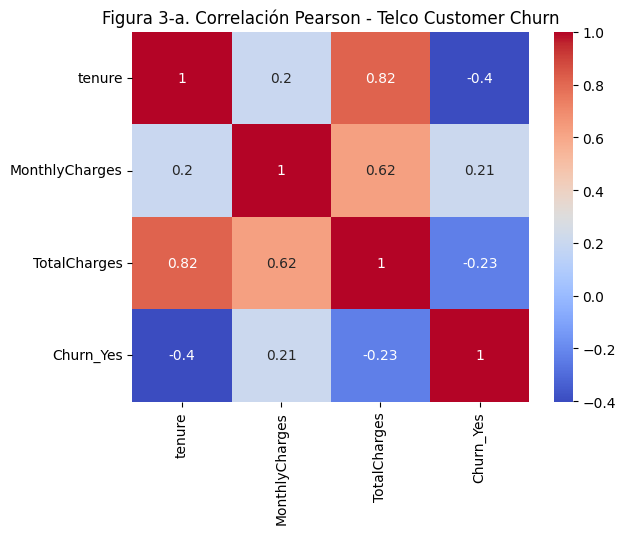

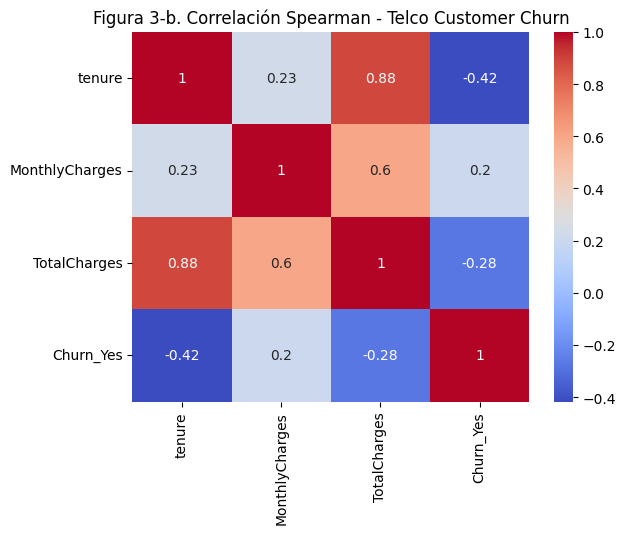

In [82]:
import seaborn as sns

# Churn binario
df_telco["Churn_Yes"] = (df_telco["Churn"]=="Yes").astype(int)

# Extender mi lista de columnas imprescindibles con addición de Churn_Yes
num_telco_ext = num_telco + ["Churn_Yes"]

# Añadimos esta columna a nuestro dataset de columnas numericas
df_telco_num["Churn_Yes"] = df_telco["Churn_Yes"]

# Correlación Pearson y Spearman
print("Telco Pearson:\n", df_telco_num[num_telco_ext].corr())
print("Telco Spearman (tenure vs Churn):\n", df_telco_num[num_telco_ext].corr(method="spearman"))

# Heatmap Pearson
sns.heatmap(df_telco_num[num_telco_ext].corr(), annot=True, cmap="coolwarm")
plt.title("Figura 3-a. Correlación Pearson - Telco Customer Churn")
plt.show()

# Matriz de correlación Spearman
corr_spearman = df_telco_num[num_telco_ext].corr(method="spearman")

sns.heatmap(corr_spearman, annot=True, cmap="coolwarm")
plt.title("Figura 3-b. Correlación Spearman - Telco Customer Churn")
plt.show()

**Pearson** (relación lineal) – Figura 3-a
- tenure – TotalCharges: correlación alta y lineal (aprox. 0.82); cuanto más tiempo lleva un cliente, más dinero ha acumulado en pagos.
- tenure – Churn_Yes: correlación negativa moderada (aprox. – 0.40); los clientes con más antigüedad suelen irse menos, aunque la relación no sigue una línea perfecta.
- Pearson se centra en identificar relaciones que se acercan a una recta, sin captar formas curvas ni relaciones basadas solo en orden.

**Spearman** (relación monotónica) – Figura 3-b
- tenure – TotalCharges: sube a aprox. 0.88, mostrando una relación monotónica fuerte: cuando una variable aumenta, la otra también, incluso si no forman una línea exacta.
- tenure – Churn_Yes: sigue siendo negativa (aprox. – 0.42); Spearman detecta mejor la tendencia por orden: “más permanencia  menos churn”.
- Spearman es apropiado cuando la relación siempre crece o siempre disminuye, incluso si la forma no es totalmente lineal. 

Creado con apoyo de documentación de seaborn:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

y de tutoriales: 

https://stackoverflow.com/questions/60479765/diminishing-the-impact-of-one-variable-over-output-in-a-regression-model/60635965#60635965

https://seaborn.pydata.org/examples/many_pairwise_correlations.html



# EJERCICIO 4: Partición y métricas

Telco Accuracy: 0.7969711310932324
Telco AUC: 0.8179871409669772
Telco Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.67      0.46      0.55       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.80      0.78      2113



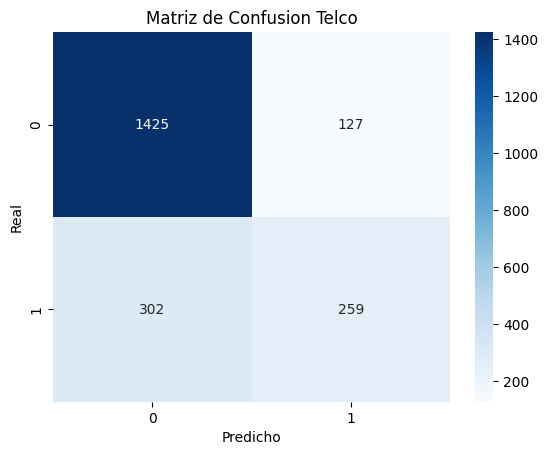

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Telco: eliminar texto y convertir categóricas a dummies
df_telco_ml = df_telco.drop(columns=["customerID", "Churn"])
cat_cols_telco = df_telco_ml.select_dtypes(include="object").columns
df_telco_ml = pd.get_dummies(df_telco_ml, columns=cat_cols_telco, drop_first=True)

X_telco_ml = df_telco_ml.drop("Churn_Yes", axis=1)
y_telco_ml = df_telco_ml["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X_telco_ml, y_telco_ml, test_size=0.3, random_state=42, stratify=y_telco_ml
)

rf_telco = RandomForestClassifier(n_estimators=50, random_state=42)
rf_telco.fit(X_train, y_train)

y_pred = rf_telco.predict(X_test)
y_proba = rf_telco.predict_proba(X_test)[:,1]

print("Telco Accuracy:", accuracy_score(y_test, y_pred))
print("Telco AUC:", roc_auc_score(y_test, y_proba))
print("Telco Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusion Telco")
plt.show()

– Usamos hold-out con train_test_split.
– El modelo usado es un Random Forest, y las métricas derivan exactamente de VP/FP/VN/FN.
– La matriz de confusión.

**Accuracy:** 0.797 (~80%)
El modelo acierta aproximadamente 8 de cada 10 predicciones. Esto significa que funciona bastante bien en general, aunque no nos dice cómo le va a cada tipo de cliente por separado, porque hay más clientes que se quedan que los que se van.

**AUC:** 0.818 (~0.82)
El AUC mide la capacidad del modelo para diferenciar entre clientes que se van (churn) y los que se quedan. Un valor de 0.82 indica buena separación, mucho mejor que un clasificador aleatorio (0.5 - adivinar al azar).

**Por clase:**

**Clase 0 (no churn)**

**Precision** 0.83 --> cuando predice que un cliente no se va, acierta la mayoría de las veces.

**Recall** 0.92 --> detecta casi todos los clientes que efectivamente no se van.

**F1** 0.87 --> combina precisión y recall, mostrando un desempeño muy bueno.

**Clase 1 (churn)**

**Precision** 0.67 --> cuando predice que un cliente se va, acierta en dos de cada tres casos.

**Recall** 0.46 --> solo detecta menos de la mitad de los clientes que realmente se van.

**F1** 0.55 --> rendimiento moderado, limitado principalmente por el bajo recall.

**Conclusión:**

El modelo identifica muy bien a los clientes que se quedan, pero no detecta tan bien a los que se van.
Esto pasa porque hay muchos más clientes que se quedan que los que se van.
Para mejorar, se podrían dar más “peso” a los clientes que se van, equilibrar los datos o probar otros modelos.

Creado con apoyo de documentación oficial de scikit-learn:

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
